In [10]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

base_dir = 'C:/KWGuideImg/dataset/train'
categories=os.listdir(base_dir) #["기념","화도","옥의","비마","새빛","참빛","한울","연구"]
nb_classes=len(categories) #class 개수 설정


#x_train, x_test, y_train, y_test=np.load('./KW_building')

#print(x_train.shape)
#print(y_train[:10])
#print(x_test.shape)



In [14]:
image_w = 64
image_h = 64 #크기지정

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):  #각각 카테고리 마다
    
    label = [0 for i in range(nb_classes)] #0부터 cata 개수만큼
    label[idx] = 1

    image_ = base_dir + "/" + cat
    files = glob.glob(image_+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)
#1 0 0 0 0 0 0 이면 기념관
#0 1 0 0 0 0 0이면 화도관


X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)
np.save('dataset_numpy.npy', xy) #("C:/KWGuideImg/dataset/test", xy) 

print("ok", len(y))

bi  파일 길이 :  3
bi  :  C:/KWGuideImg/dataset/train/bi\image_024.jpg
bok  파일 길이 :  7
bok  :  C:/KWGuideImg/dataset/train/bok\image_014.jpg
cham  파일 길이 :  6
cham  :  C:/KWGuideImg/dataset/train/cham\image_029.jpg
gi  파일 길이 :  15
gi  :  C:/KWGuideImg/dataset/train/gi\image_001.jpg
hanchoen  파일 길이 :  1
hanchoen  :  C:/KWGuideImg/dataset/train/hanchoen\image_035.jpg
hanoul  파일 길이 :  3
hanoul  :  C:/KWGuideImg/dataset/train/hanoul\image_031.jpg
hwan  파일 길이 :  9
hwan  :  C:/KWGuideImg/dataset/train/hwan\image_011.jpg
oak  파일 길이 :  6
oak  :  C:/KWGuideImg/dataset/train/oak\image_025.jpg
se  파일 길이 :  6
se  :  C:/KWGuideImg/dataset/train/se\image_030.jpg
yeon  파일 길이 :  3
yeon  :  C:/KWGuideImg/dataset/train/yeon\image_032.jpg
ok 59


In [15]:
#numpy 데이터 불러옴
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K
import tensorflow as tf

config =  tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

X_train, X_test, y_train, y_test = np.load('dataset_numpy.npy',allow_pickle=True)
print(X_train.shape)
print(X_train.shape[0])

(44, 64, 64, 3)
44


In [17]:
categories=os.listdir(base_dir)
nb_classes = len(categories)

#train/ test분류
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255
print ("ok")

ok


In [19]:
with K.tf_ops.device('/device:CPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './model'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/multi_img_classification.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)
    
    print("ok")

ok


In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)            

In [22]:
#validation 변경 -> validation_split=0.2
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

Train on 44 samples, validate on 15 samples
Epoch 1/50
44/44 [==============================] - 1s 15ms/step - loss: 2.3009 - accuracy: 0.1818 - val_loss: 2.2881 - val_accuracy: 0.2667

Epoch 00001: val_loss improved from inf to 2.28810, saving model to ./model/multi_img_classification.model
Epoch 2/50
44/44 [==============================] - 0s 6ms/step - loss: 2.2792 - accuracy: 0.2500 - val_loss: 2.2486 - val_accuracy: 0.2667

Epoch 00002: val_loss improved from 2.28810 to 2.24864, saving model to ./model/multi_img_classification.model
Epoch 3/50
44/44 [==============================] - 0s 7ms/step - loss: 2.2067 - accuracy: 0.2500 - val_loss: 2.2056 - val_accuracy: 0.2667

Epoch 00003: val_loss improved from 2.24864 to 2.20557, saving model to ./model/multi_img_classification.model
Epoch 4/50
44/44 [==============================] - 0s 8ms/step - loss: 2.1653 - accuracy: 0.2500 - val_loss: 2.2197 - val_accuracy: 0.2667

Epoch 00004: val_loss did not improve from 2.20557
Epoch 5/50


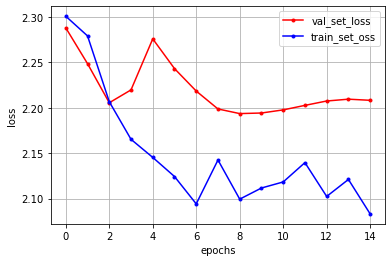

In [23]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [ ]:
#img 하나만 실행

In [50]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

test_img='C:/KWGuideImg/dataset/test/test_img2.jpg'

#image_w = 64
#image_h = 64

#pixels = image_h * image_w * 3

#files = glob.glob(base_dir+"/*.*") =
#for i, f in enumerate(files):
img = Image.open(test_img)
img = img.convert("RGB")
img = img.resize((image_w, image_h))
data = np.asarray(img)
#    filenames.append(f)  #목록이 예상크기로 조정됨 근듸 왜때문에 input이 안맞는거죠
X=np.array(data)

X = X.astype("float") / 256
X = X.reshape(-1, 64, 64,3)

X

array([[[[0.1171875 , 0.12109375, 0.140625  ],
         [0.16796875, 0.17578125, 0.203125  ],
         [0.1640625 , 0.17578125, 0.203125  ],
         ...,
         [0.25      , 0.25      , 0.25      ],
         [0.25      , 0.25      , 0.25      ],
         [0.25      , 0.25      , 0.25      ]],

        [[0.11328125, 0.12109375, 0.140625  ],
         [0.16796875, 0.17578125, 0.19921875],
         [0.1640625 , 0.17578125, 0.19921875],
         ...,
         [0.25      , 0.25      , 0.25      ],
         [0.25      , 0.25      , 0.25      ],
         [0.25      , 0.25      , 0.25      ]],

        [[0.11328125, 0.12109375, 0.13671875],
         [0.1640625 , 0.17578125, 0.1953125 ],
         [0.16015625, 0.171875  , 0.19140625],
         ...,
         [0.25      , 0.25      , 0.25      ],
         [0.25      , 0.25      , 0.25      ],
         [0.25      , 0.25      , 0.25      ]],

        ...,

        [[0.43359375, 0.41015625, 0.359375  ],
         [0.63671875, 0.6171875 , 0.5625    ]

In [51]:
pred = model.predict(X)  
result = [np.argmax(value) for value in pred]   # 예측 값중 가장 높은 클래스 반환
print('New data category : ',categories[result[0]]) #카테고리중 해당되는 것 반환 => 바꾸기

New data category :  gi


In [ ]:
#=============================================

In [ ]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

base_dir = ':C/KWGuideImg/dataset/test' #test img 넣기

In [33]:
image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(base_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)  #목록이 예상크기로 조정됨 근듸 왜때문에 input이 안맞는거죠
    X.append(data)

X = np.array(X)

X #왜 아무것도 없을꽈??


[]
[]


In [ ]:
model = load_model('./model/multi_img_classification.model')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

#prediction = model.predict(test_generator)
#np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    print(i)
    print(pre_ans)
    pre_ans_str = ''
    if pre_ans == 0: pre_ans_str = "기념관"
    elif pre_ans == 1: pre_ans_str = "화도관"
    elif pre_ans == 2: pre_ans_str = "옥의관"
    elif pre_ans == 3: pre_ans_str = "비마관"
    elif pre_ans == 4: pre_ans_str = "새빛관"
    elif pre_ans == 5: pre_ans_str = "참빛관"
    elif pre_ans == 6: pre_ans_str ="한울관"
    elif pre_ans == 7: pre_ans_str ="복지관"
    elif pre_ans == 8: pre_ans_str ="한천재"
    else: pre_ans_str = "연구관"
    
    if i[0] >= 0.8 : print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[1] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[2] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[3] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[4] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[5] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[6] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[7] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[8] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[9] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")    
   
    cnt += 1
    # print(i.argmax()) #얘가 레이블 [1. 0. 0.] 이런식으로 되어 있는 것을 숫자로 바꿔주는 것.
    # 즉 얘랑, 나중에 카테고리 데이터 불러와서 카테고리랑 비교를 해서 같으면 맞는거고, 아니면 틀린거로 취급하면 된다.
    # 이걸 한 것은 _4.py에.